**Table of contents**<a id='toc0_'></a>    
- 1. [Mexico overview ](#toc1_)    
- 2. [Load datasets ](#toc2_)    
  - 2.1. [Load earthquake catalog](#toc2_1_)    
  - 2.2. [Load tremor catalog from Jalisco-Colima (WTD)](#toc2_2_)    
  - 2.3. [Load single station tremor detections for Guerrero and Oaxaca (Husker)](#toc2_3_)    
  - 2.4. [Jalisco-Colima (WTD) ](#toc2_4_)    

<!-- vscode-jupyter-toc-config
	numbering=true
	anchor=true
	flat=false
	minLevel=1
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

# 1. <a id='toc1_'></a>Mexico overview  [&#128285;](#toc0_)

In [2]:
# Imports
%matplotlib widget
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib.colors import to_rgba

import cartopy
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter

import requests
import io

import os
import sys
# if my user name is gafarge then use the following path
if os.getlogin() == 'gafarge':
    sys.path.append('/home/gafarge/py_modules/my_modules')
    workdir = '/home/gafarge/'
elif os.getlogin() == 'root':
    sys.path.append('/Users/gaspard/Documents/work/py_modules/my_modules')
    workdir = '/Users/gaspard/Documents/work/'
from geostuff import transect

# 2. <a id='toc2_'></a>Load datasets  [&#128285;](#toc0_)

## 2.1. <a id='toc2_1_'></a>Load earthquake catalog [&#128285;](#toc0_)

In [29]:
# Load data
path = workdir + 'projects/data/Catalogs/mexico_ssn_0024/SSNMX_catalogo_20000101_20240418_utc.csv'
names = ['date', 'hour', 'mag', 'lat', 'lon', 'depth', 'loc', 'date_loc', 'hour_loc', 'status']

eq = pd.read_csv(path, names=names, skiprows=5, delimiter=',')
eq.date = pd.to_datetime(eq.date + ' ' + eq.hour)

/var/folders/_0/w1st1dg91_l80my3nlzkvb_w0000gn/T/ipykernel_18468/2994969031.py:5: DtypeWarning: Columns (2,5) have mixed types. Specify dtype option on import or set low_memory=False.
  eq = pd.read_csv(path, names=names, skiprows=5, delimiter=',')


## 2.2. <a id='toc2_2_'></a>Load tremor catalog from Jalisco-Colima (WTD) [&#128285;](#toc0_)

In [30]:
# Load data
path = workdir + 'projects/data/Catalogs/world_tremor_database/jalisco_colima_wtb_0607.csv'

COLS = ['date', 'time', 'lat', 'lon', 'depth', 'mag', 'dur', 'err', 'optional_date']
wtd_jc = pd.read_csv(
    path,
    names=COLS,
)

wtd_jc['date_str'] = wtd_jc.date.values + ' ' + wtd_jc.time.values
wtd_jc['date'] = pd.to_datetime(wtd_jc.date_str)
day0 = np.datetime64('2004-01-01')
wtd_jc['day'] = (wtd_jc.date - day0) / np.timedelta64(1, 'D')

wtd_jc.sort_values(by=["date"], inplace=True)
print('{:d} tremor detections, spanning {:d}--{:d}'.format(wtd_jc.size, wtd_jc.date.min().year, wtd_jc.date.max().year))

15521 tremor detections, spanning 2006--2007


## 2.3. <a id='toc2_3_'></a>Load single station tremor detections for Guerrero and Oaxaca (Husker) [&#128285;](#toc0_)

In [ ]:
# Plot
fig = plt.figure(figsize=(10, 10))

lon_bins = np.arange(eq.lon.min(), eq.lon.max(), .05)
lat_bins = np.arange(eq.lat.min(), eq.lat.max(), .05)
hist, _, _ = np.histogram2d(eq.lon[eq.date > np.datetime64('2010-01-01')], eq.lat[eq.date > np.datetime64('2010-01-01')], bins=[lon_bins, lat_bins])

ax = fig.add_subplot(111, projection=ccrs.PlateCarree())
ax.coastlines(resolution='10m')
ax.set_extent([-104, -95, 14, 21])
ax.imshow(np.log10(hist+1).T, origin='lower', extent=[lon_bins.min(), lon_bins.max(), lat_bins.min(), lat_bins.max()],
            transform=ccrs.PlateCarree(), cmap='hot', alpha=.5)


ax.annotate('Oaxaca', [-97, 17], xytext=[0,0], textcoords='offset points', color='black', fontsize=14, fontweight='bold')
ax.annotate('Guerrero', [-100, 18], xytext=[0,0], textcoords='offset points', color='black', fontsize=14, fontweight='bold')
# ax.annotate('Oaxaca', [-97, 17], xytext=[0,0], textcoords='offset points', color='black', fontsize=14, fontweight='bold')

# Add grid
lon_formatter = LongitudeFormatter(zero_direction_label=True)
lat_formatter = LatitudeFormatter()
ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)
ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, linewidth=1, color='gray', alpha=0.5, linestyle='--')


plt.tight_layout()
plt.show()

## 2.4. <a id='toc2_4_'></a>Jalisco-Colima (WTD)  [&#128285;](#toc0_)

15521 tremor detections, spanning 2006--2007


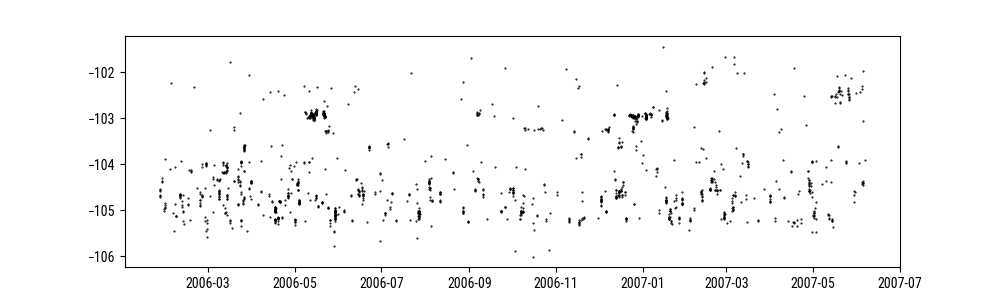